In [67]:
import dxfgrabber  #after doing "pip install dxfgrabber" from a terminal window
#CKH the plan is to create cad files for laser cutting, then move them out as dxf and create the embroidery pattern

In [68]:
dxf=dxfgrabber.readfile("huichan_5.dxf") #see https://pythonhosted.org/dxfgrabber/   

In [69]:
print("DXF version: {}".format(dxf.dxfversion))
header_var_count = len(dxf.header) # dict of dxf header vars
#what else is here? see this http://stackoverflow.com/questions/16634209/python-how-to-use-a-third-party-library

DXF version: AC1018


In [70]:
for layer in dxf.layers:
    print layer.name
    print layer.color

0
7


In [71]:
#get all entities on layer x
all_layer_0_entities = [entity for entity in dxf.entities if entity.layer == '0']
all_layer_1_entities = [entity for entity in dxf.entities if entity.layer == '1']
all_entities = [entity for entity in dxf.entities]


In [72]:
all_entities

In [73]:
dxf.entities.__len__()

14

In [74]:
for block in dxf.blocks:
    print len(block)
    print block.name  #looks like so much stuff is in a block called 'block 2'  #now maybe it's *Model_Space

0
*Paper_Space0
1
block 4
1
block 6
1
block 7
1
block 2
1
block 3
1
block 8
1
block 9
1
block 14
0
*Paper_Space
1
block 5
0
*Model_Space
1
block 15
1
block 12
1
block 13
1
block 10
1
block 11


In [75]:
dxf.blocks['block 4'].basepoint

(0.0, 0.0, 0.0)

In [76]:
MyEntities=[ele for ele in dxf.blocks['block 6']]#Found a bunch of splines in different blocks

In [77]:
#can I find out more about these splines. They should be circles that I am laser cutting.
for entity in MyEntities:
    if entity.is_closed:
        print 'Closed'
    else:
        print 'Open'

Open


In [78]:
MyEntities

In [79]:
stitchxdata=[]
stitchydata=[]
for block in dxf.blocks:
    MyEntities=[ele for ele in block]
    for entity in MyEntities:
        #print dir(entity)  #How I found out about the dxftype attribute. Splines and polylines are both in Huichen's file.
        if entity.dxftype == 'POLYLINE':  #the polylines are straight lines to the base, and appear out of order...
            #print dir(entity)
            for vertex in entity.vertices:
                #print vertex.location
                stitchxdata.append(vertex.location[0])
                stitchydata.append(vertex.location[1])
        if entity.dxftype == 'SPLINE':  #the splines form two circular paths but the ctrl points are chunky
            for point in entity.controlpoints: #Will the fiber just flow around the corners bc it is sorta rigid
                stitchxdata.append(point[0])
                stitchydata.append(point[1])
  
        


In [80]:
#stitchdata

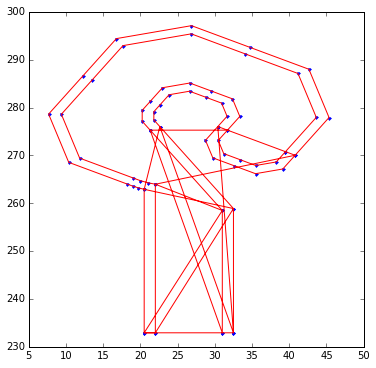

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
#getting this from here http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
plt.figure(1,figsize=(6,6))
plt.plot(stitchxdata,stitchydata,'b.')
plt.hold(True)
plt.plot(stitchxdata,stitchydata,'r-')


In [82]:
#got some of Huichan's control points but could do better!